# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [4]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [6]:
len(training_set)

1258

In [7]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [8]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [11]:
X_train = []
y_train = []

for i in range(60, 1258):
    
    X_train.append(training_set_scaled[i-60:i, 0])
    
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape, X_train

((1198, 60),
 array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]))

In [13]:
y_train.shape, y_train

((1198,),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

### Reshaping

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  ###(batch size, timestamps, indicators(number of outputs))

In [15]:
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

2024-06-30 11:08:02.917250: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-30 11:08:02.918660: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 11:08:02.981376: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-30 11:08:03.301576: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-30 11:08:05.232684: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

### Initialising the RNN

In [17]:
regressor = Sequential()

### Adding the first RNN layer and some Dropout regularisation

In [18]:
regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

/home/its_relative/virEnvs/py312/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second RNN layer and some Dropout regularisation

In [19]:
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third RNN layer and some Dropout regularisation

In [20]:
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth RNN layer and some Dropout regularisation

In [21]:
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [22]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [23]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [24]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.4396
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.2800
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.2005
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1667
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.1117
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0881
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0780
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0656
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0593
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0488
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0381
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0417
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0336
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0314
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - lo

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [25]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [26]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)


predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


In [27]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [28]:
predicted_stock_price

array([[797.2839 ],
       [796.4247 ],
       [796.66046],
       [798.7408 ],
       [800.29315],
       [802.2346 ],
       [803.99243],
       [805.0463 ],
       [805.0813 ],
       [805.2058 ],
       [805.99493],
       [806.35846],
       [805.5371 ],
       [804.3643 ],
       [804.2877 ],
       [806.143  ],
       [809.07086],
       [812.2738 ],
       [814.8353 ],
       [814.17706]], dtype=float32)

### Visualising the results

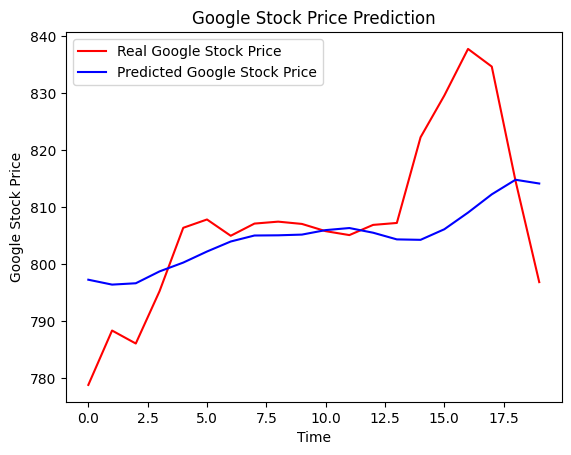

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()